<a href="https://colab.research.google.com/github/lululu-mia/Data-Science/blob/main/Homework/Week6_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# (Homework) Week 6 - DataScience Bootcamp Fall 2025

All solution cells are replaced with `# TODO` placeholders so you can fill them in.

**Name:** Jingwen Lu \
**Email:** jl16556@nyu.edu

---

### Problem 1: Dataset Splitting

1. You have recordings of 44 phones from 100 people; each person records ~200 phones/day for 5 days.
   - Design a valid training/validation/test split strategy that ensures the model generalizes to **new speakers**.

2. You now receive an additional dataset of 10,000 phone recordings from **Kilian**, a single speaker.
   - You must train a model that performs well **specifically for Kilian**, while also maintaining generalization.

*Describe your proposed split strategy and reasoning.* (Theory)


**Proposed Split Strategy:**

**Part 1: For 100 speakers with 44 phones (~200 recordings/day for 5 days)**

I propose a **speaker-independent split** strategy:
- **Training set**: 70 speakers (70%)
- **Validation set**: 15 speakers (15%)
- **Test set**: 15 speakers (15%)

**Critical principle**: All recordings from the same speaker must stay in the same set. Never split a single speaker's recordings across different sets.

**Reasoning:**
- This ensures the model is evaluated on completely unseen speakers, testing true generalization ability rather than memorization
- Prevents data leakage where test speakers appear in training
- Mimics real-world deployment where the system encounters entirely new users
- If we randomly split recordings instead of speakers, the model could memorize speaker-specific characteristics and achieve artificially high test accuracy

**Part 2: For Kilian's 10,000 recordings (single speaker)**

**Strategy**: Stratified split for Kilian + Combined training approach
- Split Kilian's data: 80% training (8,000), 10% validation (1,000), 10% test (1,000)
- **Final combined sets**:
  - Training = 70 speakers + 8,000 Kilian recordings
  - Validation = 15 speakers + 1,000 Kilian recordings
  - Test = 15 speakers + 1,000 Kilian recordings

**Reasoning:**
- Including Kilian's data in training enables **personalization** - the model learns his specific voice characteristics
- Maintaining separate validation/test sets for Kilian allows us to measure **speaker-specific performance** for him
- The large dataset size (10,000 samples) makes splitting safe without overfitting concerns
- This approach achieves **dual objectives**:
  1. General speaker-independent performance (tested on 15 held-out speakers)
  2. Specialized performance for Kilian (tested on 1,000 held-out Kilian samples)
- Validation set enables hyperparameter tuning to balance general vs. Kilian-specific performance
- This simulates scenarios like voice assistants that improve for individual users while maintaining general capability


### Problem 2: K-Nearest Neighbors

1. **1-NN Classification:** Given dataset:

   Positive: (1,2), (1,4), (5,4)

   Negative: (3,1), (3,2)

   Plot the 1-NN decision boundary and classify new points visually.

2. **Feature Scaling:** Consider dataset:

   Positive: (100,2), (100,4), (500,4)

   Negative: (300,1), (300,2)

   What would the 1-NN classify point (500,1) as **before and after scaling** to [0,1] per feature?

3. **Handling Missing Values:** How can you modify K-NN to handle missing features in a test point?

4. **High-dimensional Data:** Why can K-NN still work well for images even with thousands of pixels?


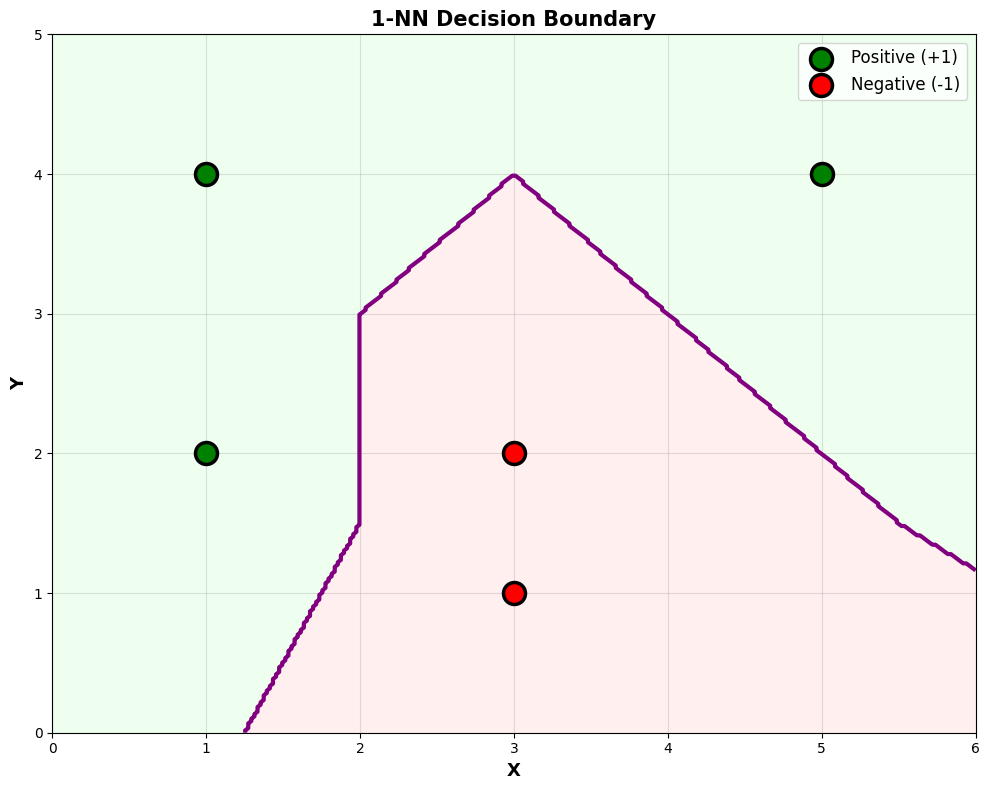

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
positive_points = np.array([[1, 2], [1, 4], [5, 4]])
negative_points = np.array([[3, 1], [3, 2]])

all_points = np.vstack([positive_points, negative_points])
all_labels = np.array([1, 1, 1, -1, -1])

# Create grid for decision boundary
x_min, x_max = 0, 6
y_min, y_max = 0, 5
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

# Classify each point in the grid using 1-NN
grid_points = np.c_[xx.ravel(), yy.ravel()]
predictions = []

for point in grid_points:
    # Calculate distances to all training points
    distances = np.sqrt(np.sum((all_points - point)**2, axis=1))
    nearest_idx = np.argmin(distances)
    predictions.append(all_labels[nearest_idx])

predictions = np.array(predictions).reshape(xx.shape)

# Plot
fig, ax = plt.subplots(figsize=(10, 8))

# Decision regions
ax.contourf(xx, yy, predictions, alpha=0.3, levels=[-1.5, 0, 1.5],
            colors=['#ffcccc', '#ccffcc'])
ax.contour(xx, yy, predictions, levels=[0], colors='purple', linewidths=3)

# Data points
ax.scatter(positive_points[:, 0], positive_points[:, 1],
          c='green', s=250, marker='o', edgecolors='black', linewidths=2.5,
          label='Positive (+1)', zorder=5)
ax.scatter(negative_points[:, 0], negative_points[:, 1],
          c='red', s=250, marker='o', edgecolors='black', linewidths=2.5,
          label='Negative (-1)', zorder=5)

ax.set_xlabel('X', fontsize=13, fontweight='bold')
ax.set_ylabel('Y', fontsize=13, fontweight='bold')
ax.set_title('1-NN Decision Boundary', fontsize=15, fontweight='bold')
ax.legend(fontsize=12)
ax.grid(True, alpha=0.4)
plt.tight_layout()
plt.show()

BEFORE SCALING:
Test point: [500   1]
  Distance to [100   2]: 400.00 (Positive)
  Distance to [100   4]: 400.01 (Positive)
  Distance to [500   4]: 3.00 (Positive) ← NEAREST
  Distance to [300   1]: 200.00 (Negative)
  Distance to [300   2]: 200.00 (Negative)
Prediction: 1 (Positive)

AFTER SCALING to [0,1]:
Test point: [1.   0.25]
  Distance to [0.2 0.5]: 0.8382 (Positive)
  Distance to [0.2 1. ]: 1.0966 (Positive)
  Distance to [1. 1.]: 0.7500 (Positive)
  Distance to [0.6  0.25]: 0.4000 (Negative) ← NEAREST
  Distance to [0.6 0.5]: 0.4717 (Negative)
Prediction: -1 (Negative)

RESULT: Classification changed from 1 to -1


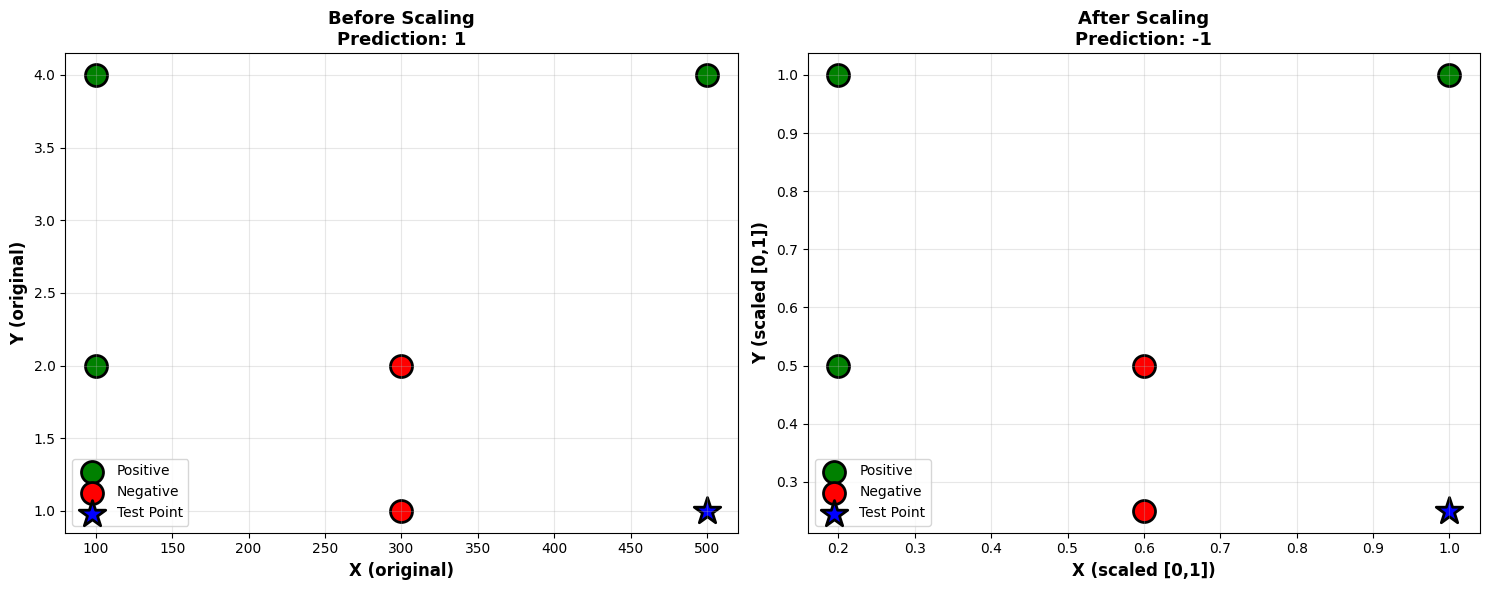

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Unscaled data
pos_unscaled = np.array([[100, 2], [100, 4], [500, 4]])
neg_unscaled = np.array([[300, 1], [300, 2]])
test_point_unscaled = np.array([500, 1])

all_unscaled = np.vstack([pos_unscaled, neg_unscaled])
labels = np.array([1, 1, 1, -1, -1])

# BEFORE SCALING
distances_before = np.sqrt(np.sum((all_unscaled - test_point_unscaled)**2, axis=1))
nearest_idx_before = np.argmin(distances_before)
prediction_before = labels[nearest_idx_before]

print("BEFORE SCALING:")
print(f"Test point: {test_point_unscaled}")
for i, (point, dist, label) in enumerate(zip(all_unscaled, distances_before, labels)):
    class_name = "Positive" if label == 1 else "Negative"
    marker = " ← NEAREST" if i == nearest_idx_before else ""
    print(f"  Distance to {point}: {dist:.2f} ({class_name}){marker}")
print(f"Prediction: {prediction_before} ({'Positive' if prediction_before == 1 else 'Negative'})\n")

# AFTER SCALING to [0,1]
x_max, y_max = 500.0, 4.0
pos_scaled = pos_unscaled / np.array([x_max, y_max])
neg_scaled = neg_unscaled / np.array([x_max, y_max])
test_point_scaled = test_point_unscaled / np.array([x_max, y_max])

all_scaled = np.vstack([pos_scaled, neg_scaled])
distances_after = np.sqrt(np.sum((all_scaled - test_point_scaled)**2, axis=1))
nearest_idx_after = np.argmin(distances_after)
prediction_after = labels[nearest_idx_after]

print("AFTER SCALING to [0,1]:")
print(f"Test point: {test_point_scaled}")
for i, (point, dist, label) in enumerate(zip(all_scaled, distances_after, labels)):
    class_name = "Positive" if label == 1 else "Negative"
    marker = " ← NEAREST" if i == nearest_idx_after else ""
    print(f"  Distance to {point}: {dist:.4f} ({class_name}){marker}")
print(f"Prediction: {prediction_after} ({'Positive' if prediction_after == 1 else 'Negative'})\n")

print(f"RESULT: Classification changed from {prediction_before} to {prediction_after}")

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Before scaling
ax1.scatter(pos_unscaled[:, 0], pos_unscaled[:, 1], c='green', s=250,
           marker='o', edgecolors='black', linewidths=2, label='Positive')
ax1.scatter(neg_unscaled[:, 0], neg_unscaled[:, 1], c='red', s=250,
           marker='o', edgecolors='black', linewidths=2, label='Negative')
ax1.scatter(test_point_unscaled[0], test_point_unscaled[1], c='blue', s=400,
           marker='*', edgecolors='black', linewidths=2, label='Test Point')
ax1.set_xlabel('X (original)', fontsize=12, fontweight='bold')
ax1.set_ylabel('Y (original)', fontsize=12, fontweight='bold')
ax1.set_title(f'Before Scaling\nPrediction: {prediction_before}', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(True, alpha=0.3)

# After scaling
ax2.scatter(pos_scaled[:, 0], pos_scaled[:, 1], c='green', s=250,
           marker='o', edgecolors='black', linewidths=2, label='Positive')
ax2.scatter(neg_scaled[:, 0], neg_scaled[:, 1], c='red', s=250,
           marker='o', edgecolors='black', linewidths=2, label='Negative')
ax2.scatter(test_point_scaled[0], test_point_scaled[1], c='blue', s=400,
           marker='*', edgecolors='black', linewidths=2, label='Test Point')
ax2.set_xlabel('X (scaled [0,1])', fontsize=12, fontweight='bold')
ax2.set_ylabel('Y (scaled [0,1])', fontsize=12, fontweight='bold')
ax2.set_title(f'After Scaling\nPrediction: {prediction_after}', fontsize=13, fontweight='bold')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Three methods to modify K-NN to handle missing features in a test point:

**Method 1: Modified Distance Metric**

Compute distance using only the available (non-missing) features, then apply a scaling factor to normalize:

- Formula: `d = sqrt(Σ(x_i - y_i)² for non-missing features) × sqrt(n/m)`
  - where `n` = total number of features
  - `m` = number of available features

- Example:
  - Test point: `(?, 5, 3)` with first feature missing
  - Training point: `(2, 4, 3)`
  - Modified distance = `sqrt((5-4)² + (3-3)²) × sqrt(3/2) = 1.0 × 1.225 = 1.225`

**Method 2: Imputation Before K-NN**

Fill in missing values before applying K-NN:
- **Mean/Median imputation**: Replace missing values with the feature's mean or median from training data
- **K-NN imputation**: Use K-NN itself to predict missing values based on similar examples
- **Mode imputation**: For categorical features, use the most frequent value
- **Forward/backward fill**: For time-series data with temporal dependencies

**Method 3: Distance-Weighted Voting**

Weight each neighbor's contribution based on the proportion of features available:
- Formula: `weight = (num_common_features / total_features) × (1 / distance)`
- Neighbors with more complete feature overlap have greater influence
- This naturally handles varying degrees of missingness

**Recommendation**: Method 1 (Modified Distance) is most practical because it:
- Requires no preprocessing or training data statistics
- Works with arbitrary missing patterns in test data
- Preserves K-NN's simplicity and interpretability
- Handles cases where training and test data have different missing patterns

K-NN can still work well for images despite having thousands of pixels (high dimensionality) for several key reasons:

**1. Structured High Dimensionality**

Unlike random high-dimensional data, image pixels have inherent structure:
- **Spatial correlation**: Nearby pixels tend to have similar values
- **Local patterns**: Edges, textures, and shapes create meaningful local structure
- Pixels are not independent random dimensions—they form coherent visual patterns

**2. Low Intrinsic Dimensionality (Manifold Hypothesis)**

Natural images lie on much lower-dimensional manifolds within the high-dimensional pixel space:
- A 1000×1000 image nominally has 1,000,000 dimensions
- However, actual image variations span far fewer "degrees of freedom"
- Example: All cat images share common features (ears, eyes, fur patterns) despite having millions of pixels—they cluster in a small region of the full space
- This low intrinsic dimensionality means meaningful distances still exist

**3. Appropriate Distance Metrics**

Choosing the right distance metric helps:
- **L2 (Euclidean)**: Simple pixel-wise comparison that works surprisingly well
- **Cosine similarity**: Measures angle between vectors, invariant to overall brightness
- **Feature-based distances**: Extract features (HOG, SIFT, CNN embeddings) first, then apply K-NN in lower-dimensional feature space (most effective modern approach)

**4. Curse of Dimensionality is Mitigated**

While theory predicts all points become equidistant in high dimensions, this is mitigated for images because:
- Image datasets are **dense enough** that nearest neighbors remain meaningful
- Similar images genuinely have small distances due to shared visual structure
- Data preprocessing (normalization, PCA, feature extraction) concentrates meaningful variation
- The "curse" applies to uniformly distributed random data, not structured data like images

**5. Practical Success Factors**

In practice, K-NN works for images because:
- **Large datasets** (e.g., ImageNet with millions of images) provide sufficient local density
- **Data augmentation** increases effective sample size and coverage
- **Feature extraction**: Modern approach uses CNNs to extract meaningful embeddings (e.g., 512-D) before K-NN
- K-NN serves as an effective **baseline** and sanity check for more complex models

**Conclusion**: K-NN works for images not despite high dimensionality, but because images have structured redundancy and low intrinsic dimensionality that makes distance-based methods meaningful.

### Problem 3: Part 1

You are given a fully trained Perceptron model with weight vector **w**, along with training set **D_TR** and test set **D_TE**.

1. Your co-worker suggests evaluating $h(x) = sign(w \cdot x)$ for every $(x, y)$ in D_TR and D_TE. Does this help determine whether test error is higher than training error?
2. Why is there no need to compute training error explicitly for the Perceptron algorithm?

**Question 1**: Your co-worker suggests evaluating h(x) = sign(w·x) for every (x, y) in D_TR and D_TE. Does this help determine whether test error is higher than training error?

**Answer**: **YES**, this approach does help determine whether test error is higher than training error.

**Reasoning**:
- By evaluating h(x) = sign(w·x) on both datasets, we obtain predictions for all points
- We can then compute:
  - **Training error** = (# misclassified points in D_TR) / |D_TR|
  - **Test error** = (# misclassified points in D_TE) / |D_TE|
- Direct comparison of these two values tells us if test error > training error
- For a converged Perceptron on linearly separable data: training error = 0
- Therefore, if test error > 0, then test error > training error, indicating the model doesn't generalize perfectly

Mathematical formulation:
- Training error = (1/|D_TR|) Σ I[h(x_i) ≠ y_i] for (x_i, y_i) ∈ D_TR
- Test error = (1/|D_TE|) Σ I[h(x_j) ≠ y_j] for (x_j, y_j) ∈ D_TE
- where I[·] is the indicator function (1 if true, 0 if false)

---

**Question 2**: Why is there no need to compute training error explicitly for the Perceptron algorithm?

**Answer**: The Perceptron algorithm **implicitly tracks training error** through its update mechanism, making explicit computation unnecessary.

**Reasoning**:
- **Perceptron update rule**: w ← w + η·y·x (only applied when sign(w·x) ≠ y)
- The algorithm **only updates on misclassified points**
- **Convergence criterion**: No updates occur in a complete pass through training data
- When no updates occur → all points are correctly classified → training error = 0
- The algorithm inherently knows the training error by whether it needs to update

Formal reasoning:
- Training error = (1/n) Σ I[sign(w·x_i) ≠ y_i]
- Perceptron converges ⟺ No misclassifications ⟺ Training error = 0
- Therefore, **explicit computation is redundant**—convergence implies perfect training accuracy

**Important caveat**: This applies to **linearly separable data**. For non-linearly separable data, the Perceptron may not converge, and we would need to track errors explicitly or set a maximum iteration limit.


### Problem 3: Two-point 2D Dataset (Part 2)

Run the Perceptron algorithm **by hand or in code** on the following data:

1. Positive class: (10, -2)
2. Negative class: (12, 2)

Start with $w_0 = (0, 0)$ and a learning rate of 1.

- Compute how many updates are required until convergence.
- Write down the sequence of $w_i$ vectors.

Iter   Weight               Point           Label   Pred    Action
----------------------------------------------------------------------
0      (  0.0,   0.0)         Initial         -       -       Start
1      (-12.0,  -2.0)         (  12,    2)       -1       1    UPDATE
2      ( -2.0,  -4.0)         (  10,   -2)        1      -1    UPDATE
3      (  8.0,  -6.0)         (  10,   -2)        1      -1    UPDATE
4      ( -4.0,  -8.0)         (  12,    2)       -1       1    UPDATE
5      (  6.0, -10.0)         (  10,   -2)        1      -1    UPDATE
6      ( -6.0, -12.0)         (  12,    2)       -1       1    UPDATE
7      (  4.0, -14.0)         (  10,   -2)        1      -1    UPDATE
8      ( -8.0, -16.0)         (  12,    2)       -1       1    UPDATE
9      (  2.0, -18.0)         (  10,   -2)        1      -1    UPDATE
----------------------------------------------------------------------
✓ CONVERGED

RESULTS:
Total updates required: 9
Final weight vector: w = (2.0, -18.0)

Sequen

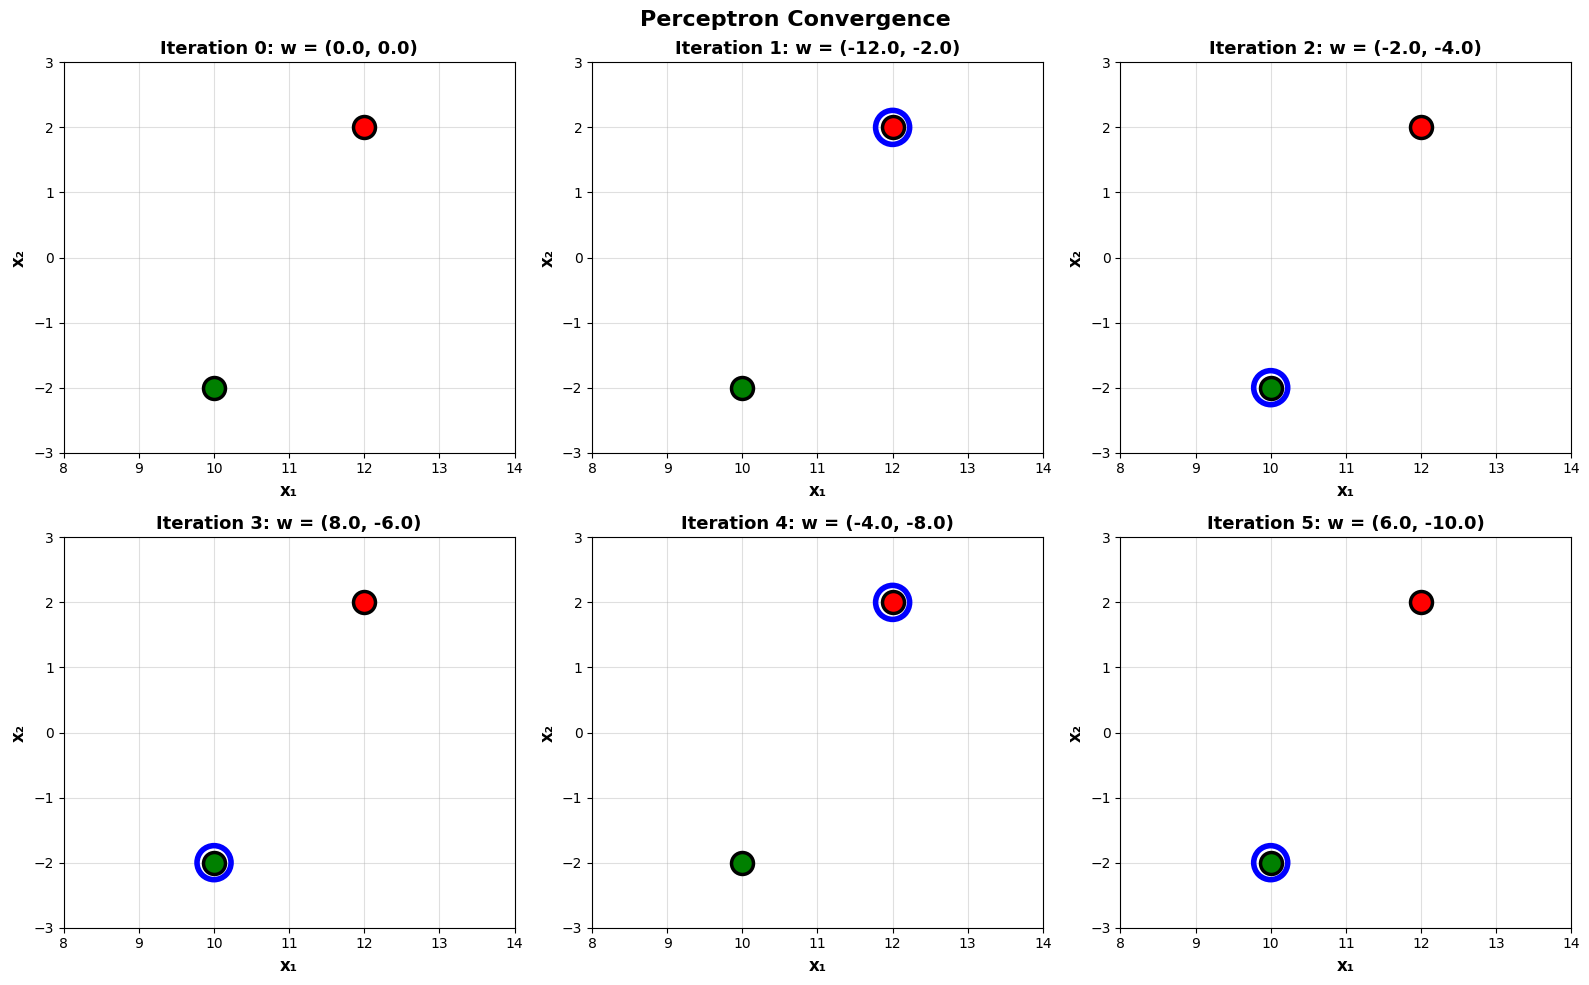

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Dataset
train_data = np.array([
    [10, -2, 1],   # (x1, x2, label)
    [12, 2, -1]
])

def perceptron_algorithm(data, learning_rate=1, max_iter=100):
    """Run Perceptron algorithm and track updates"""
    w = np.array([0.0, 0.0])
    updates = []

    print(f"{'Iter':<6} {'Weight':<20} {'Point':<15} {'Label':<7} {'Pred':<7} {'Action'}")
    print("-" * 70)
    print(f"{0:<6} ({w[0]:>5.1f}, {w[1]:>5.1f}){'':>8} {'Initial':<15} {'-':<7} {'-':<7} Start")

    iteration = 0
    converged = False

    while not converged and iteration < max_iter:
        converged = True

        for point in data:
            x = point[:2]
            y = point[2]

            # Prediction
            prediction = np.sign(np.dot(w, x))
            if prediction == 0:
                prediction = 1  # Default to +1 if exactly 0

            # Check if misclassified
            if prediction != y:
                converged = False
                w = w + learning_rate * y * x
                iteration += 1

                print(f"{iteration:<6} ({w[0]:>5.1f}, {w[1]:>5.1f}){'':>8} " +
                      f"({x[0]:>4.0f}, {x[1]:>4.0f}){'':>4} {y:>4.0f}{'':>3} " +
                      f"{prediction:>4.0f}{'':>3} UPDATE")

                updates.append({
                    'iteration': iteration,
                    'weight': w.copy(),
                    'point': x.copy(),
                    'label': y
                })

    print("-" * 70)
    if converged:
        print("✓ CONVERGED")

    return w, updates

# Run Perceptron
final_w, updates = perceptron_algorithm(train_data)

print(f"\nRESULTS:")
print(f"Total updates required: {len(updates)}")
print(f"Final weight vector: w = ({final_w[0]:.1f}, {final_w[1]:.1f})")

print(f"\nSequence of weight vectors:")
print(f"w₀ = (0.0, 0.0)")
for i, update in enumerate(updates, 1):
    w = update['weight']
    print(f"w₍{i}₎ = ({w[0]:.1f}, {w[1]:.1f})")

# Visualization
fig, axes = plt.subplots(2, 3, figsize=(16, 10))
axes = axes.ravel()

all_states = [{'iteration': 0, 'weight': np.array([0., 0.]), 'point': None}] + updates

for idx in range(min(6, len(all_states))):
    ax = axes[idx]
    state = all_states[idx]
    w = state['weight']

    # Plot data points
    for d in train_data:
        color = 'green' if d[2] == 1 else 'red'
        ax.scatter(d[0], d[1], c=color, s=250,
                  edgecolors='black', linewidths=2.5, zorder=5)

    # Highlight updated point
    if state['point'] is not None:
        ax.scatter(state['point'][0], state['point'][1], s=600,
                  facecolors='none', edgecolors='blue', linewidths=4, zorder=6)

    # Plot decision boundary
    if np.any(w != 0) and w[1] != 0:
        x_vals = np.linspace(8, 14, 100)
        y_vals = -(w[0] * x_vals) / w[1]
        mask = (y_vals >= -3) & (y_vals <= 3)
        if np.any(mask):
            ax.plot(x_vals[mask], y_vals[mask], 'purple', linewidth=3)

    ax.set_xlim(8, 14)
    ax.set_ylim(-3, 3)
    ax.set_xlabel('x₁', fontsize=12, fontweight='bold')
    ax.set_ylabel('x₂', fontsize=12, fontweight='bold')
    ax.set_title(f'Iteration {state["iteration"]}: w = ({w[0]:.1f}, {w[1]:.1f})',
                fontsize=13, fontweight='bold')
    ax.grid(True, alpha=0.4)

plt.suptitle('Perceptron Convergence', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

### Problem 4: Reconstructing the Weight Vector

Given the log of Perceptron updates:

| x | y | count |
|---|---|--------|
| (0, 0, 0, 0, 4) | +1 | 2 |
| (0, 0, 6, 5, 0) | +1 | 1 |
| (3, 0, 0, 0, 0) | -1 | 1 |
| (0, 9, 3, 6, 0) | -1 | 1 |
| (0, 1, 0, 2, 5) | -1 | 1 |

Assume learning rate = 1 and initial weight $w_0 = (0, 0, 0, 0, 0)$.

Compute the final weight vector after all updates.

In [4]:
import numpy as np

# Update log
update_log = [
    ([0, 0, 0, 0, 4], +1, 2),
    ([0, 0, 6, 5, 0], +1, 1),
    ([3, 0, 0, 0, 0], -1, 1),
    ([0, 9, 3, 6, 0], -1, 1),
    ([0, 1, 0, 2, 5], -1, 1)
]

def reconstruct_weight_vector(update_log):
    """Reconstruct weight from update log"""
    w = np.array([0, 0, 0, 0, 0], dtype=float)

    print(f"{'Step':<7} {'Weight Vector':<40} {'Update Applied'}")
    print("-" * 90)
    print(f"{0:<7} {str(w.astype(int)):<40} Initial")

    step = 1
    for x, y, count in update_log:
        x_vec = np.array(x)
        for i in range(count):
            w = w + y * x_vec
            update_desc = f"Add ({y:+d})×{x} [iteration {i+1}/{count}]"
            print(f"{step:<7} {str(w.astype(int)):<40} {update_desc}")
            step += 1

    print("-" * 90)
    return w

final_weight = reconstruct_weight_vector(update_log)

print(f"\nFINAL WEIGHT VECTOR: w = {final_weight.astype(int)}")

print("\n" + "="*80)
print("Detailed Calculation:")
print("="*80)
print("w₀ = [0, 0, 0, 0, 0]")
print("\nStep 1-2: Add 2×(+1)×[0,0,0,0,4] = [0, 0, 0, 0, 8]")
print("Step 3:   Add 1×(+1)×[0,0,6,5,0] = [0, 0, 6, 5, 8]")
print("Step 4:   Add 1×(-1)×[3,0,0,0,0] = [-3, 0, 6, 5, 8]")
print("Step 5:   Add 1×(-1)×[0,9,3,6,0] = [-3, -9, 3, -1, 8]")
print("Step 6:   Add 1×(-1)×[0,1,0,2,5] = [-3, -10, 3, -3, 3]")
print(f"\nFINAL: w = {final_weight.astype(int)}")

Step    Weight Vector                            Update Applied
------------------------------------------------------------------------------------------
0       [0 0 0 0 0]                              Initial
1       [0 0 0 0 4]                              Add (+1)×[0, 0, 0, 0, 4] [iteration 1/2]
2       [0 0 0 0 8]                              Add (+1)×[0, 0, 0, 0, 4] [iteration 2/2]
3       [0 0 6 5 8]                              Add (+1)×[0, 0, 6, 5, 0] [iteration 1/1]
4       [-3  0  6  5  8]                         Add (-1)×[3, 0, 0, 0, 0] [iteration 1/1]
5       [-3 -9  3 -1  8]                         Add (-1)×[0, 9, 3, 6, 0] [iteration 1/1]
6       [ -3 -10   3  -3   3]                    Add (-1)×[0, 1, 0, 2, 5] [iteration 1/1]
------------------------------------------------------------------------------------------

FINAL WEIGHT VECTOR: w = [ -3 -10   3  -3   3]

Detailed Calculation:
w₀ = [0, 0, 0, 0, 0]

Step 1-2: Add 2×(+1)×[0,0,0,0,4] = [0, 0, 0, 0, 8]
Step 3:   Add

### Problem 5: Visualizing Perceptron Convergence

Implement a Perceptron on a small 2D dataset with positive and negative examples.

- Plot the data points.
- After each update, visualize the decision boundary.
- Show how it converges to a stable separator.

Converged after 2 updates
Final weight: w = (2.00, 1.00)


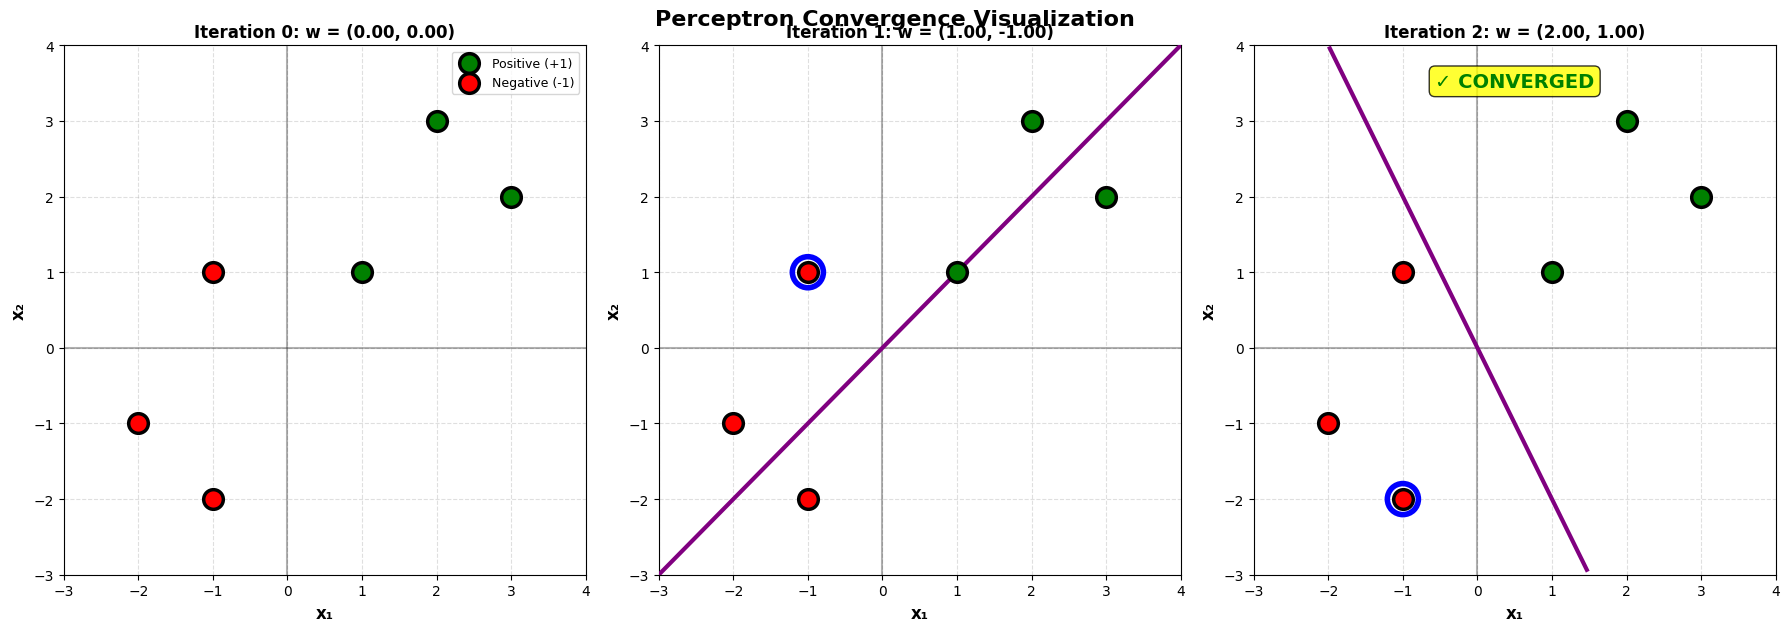


Visualization shows:
  • Green dots = Positive class (+1)
  • Red dots = Negative class (-1)
  • Purple line = Decision boundary
  • Blue circle = Point that triggered update

The boundary adjusts after each misclassification until convergence.


In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Small 2D dataset
viz_data = np.array([
    [2, 3, 1],      # Positive
    [1, 1, 1],
    [3, 2, 1],
    [-1, 1, -1],    # Negative
    [-2, -1, -1],
    [-1, -2, -1]
])

def perceptron_with_visualization(data, learning_rate=1, max_iter=50):
    """Run Perceptron and save history for visualization"""
    w = np.array([0.0, 0.0])
    history = [{'weight': w.copy(), 'point': None, 'iteration': 0}]

    iteration = 0
    converged = False

    while not converged and iteration < max_iter:
        converged = True

        for point in data:
            x = point[:2]
            y = point[2]

            prediction = np.sign(np.dot(w, x))
            if prediction == 0:
                prediction = 1

            if prediction != y:
                converged = False
                w = w + learning_rate * y * x
                iteration += 1

                history.append({
                    'weight': w.copy(),
                    'point': x.copy(),
                    'iteration': iteration
                })

    return w, history

# Run Perceptron
final_w, history = perceptron_with_visualization(viz_data)

print(f"Converged after {len(history)-1} updates")
print(f"Final weight: w = ({final_w[0]:.2f}, {final_w[1]:.2f})")

# Visualization
num_plots = min(9, len(history))
fig, axes = plt.subplots(3, 3, figsize=(18, 18))
axes = axes.ravel()

for idx in range(num_plots):
    ax = axes[idx]
    state = history[idx]
    w = state['weight']

    # Separate classes
    positive = viz_data[viz_data[:, 2] == 1]
    negative = viz_data[viz_data[:, 2] == -1]

    # Plot data points
    ax.scatter(positive[:, 0], positive[:, 1], c='green', s=200,
              marker='o', edgecolors='black', linewidths=2.5,
              label='Positive (+1)', zorder=5)
    ax.scatter(negative[:, 0], negative[:, 1], c='red', s=200,
              marker='o', edgecolors='black', linewidths=2.5,
              label='Negative (-1)', zorder=5)

    # Highlight updated point
    if state['point'] is not None:
        ax.scatter(state['point'][0], state['point'][1], s=500,
                  facecolors='none', edgecolors='blue', linewidths=4,
                  label='Just Updated', zorder=6)

    # Plot decision boundary
    if np.any(w != 0) and w[1] != 0:
        x_line = np.linspace(-3, 4, 200)
        y_line = -(w[0] * x_line) / w[1]
        mask = (y_line >= -3) & (y_line <= 4)
        if np.any(mask):
            ax.plot(x_line[mask], y_line[mask], 'purple',
                   linewidth=3, label='Decision Boundary', zorder=4)

    ax.set_xlim(-3, 4)
    ax.set_ylim(-3, 4)
    ax.set_xlabel('x₁', fontsize=12, fontweight='bold')
    ax.set_ylabel('x₂', fontsize=12, fontweight='bold')
    ax.set_title(f'Iteration {state["iteration"]}: w = ({w[0]:.2f}, {w[1]:.2f})',
                fontsize=12, fontweight='bold')
    ax.grid(True, alpha=0.4, linestyle='--')
    ax.axhline(y=0, color='k', linestyle='-', alpha=0.3)
    ax.axvline(x=0, color='k', linestyle='-', alpha=0.3)

    if idx == 0:
        ax.legend(loc='upper right', fontsize=9)

    # Mark convergence
    if idx == len(history) - 1:
        ax.text(0.5, 0.95, '✓ CONVERGED', transform=ax.transAxes,
               fontsize=14, fontweight='bold', color='green',
               ha='center', va='top',
               bbox=dict(boxstyle='round', facecolor='yellow', alpha=0.8))

# Remove unused subplots
for idx in range(num_plots, len(axes)):
    fig.delaxes(axes[idx])

plt.suptitle('Perceptron Convergence Visualization',
            fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("\nVisualization shows:")
print("  • Green dots = Positive class (+1)")
print("  • Red dots = Negative class (-1)")
print("  • Purple line = Decision boundary")
print("  • Blue circle = Point that triggered update")
print("\nThe boundary adjusts after each misclassification until convergence.")
